In [1]:
import utils as u
import networkx as nx
import random
import matplotlib.pyplot as plt
from cdlib import algorithms
import numpy as np
import math
import pandas as pd
from tqdm import tqdm
import importlib

Note: to be able to use all crisp methods, you need to install some additional packages:  {'bayanpy', 'wurlitzer', 'graph_tool', 'infomap'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


## 1 Where is SN100?

In [103]:
G = u.read_pajek("dolphins.net")
u.info(G)

  MultiGraph | 'dolphins'
       Nodes | 62 (iso=0)
       Edges | 159 (loop=0)
      Degree | 5.13 (max=12)
         LCC | 100.0% (n=1)
  Clustering | 0.2590



In [104]:
G = u.read_pajek("dolphins.net")
u.info(G)
bet_cen = nx.betweenness_centrality(G)
G.nodes[max(bet_cen, key=bet_cen.get)]['label']

'SN100'

In [116]:
for node in sorted(bet_cen, key=bet_cen.get, reverse=True)[:5]:
    print(round(bet_cen[node], 3), "\t", node,"\t", G.nodes[node]['label'])

0.248 	 36 	 SN100
0.213 	 1 	 Beescratch
0.143 	 40 	 SN9
0.139 	 37 	 SN4
0.118 	 7 	 DN63


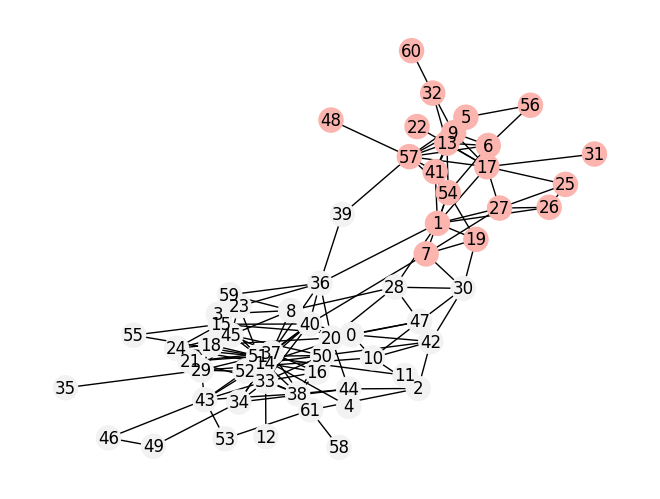

In [85]:
nx.draw(G, with_labels=True, node_color=[int(G.nodes[n]['value']) for n in G.nodes], cmap='Pastel1')

## 2 HIV and network sampling

In [98]:
G = u.read_pajek("social.net")
u.info(G)
aspl = nx.average_shortest_path_length(G)
n = len(G)
k = sum(dict(G.degree).values())/n
print("Average shortest path | ", aspl)
print("approx | ", (np.log(n)/np.log(k)))
print(4.55/(10680-1))

  MultiGraph | 'social'
       Nodes | 10,680 (iso=0)
       Edges | 24,316 (loop=0)
      Degree | 4.55 (max=205)
         LCC | 100.0% (n=1)


  Clustering | 0.2683

Average shortest path |  7.4855400514784
ASPL approx |  6.119185664133248


In [99]:
current_node = random.choice(list(G.nodes))
visited_nodes = {current_node}

while True:
    if len(visited_nodes) == int(len(G.nodes)*0.15):
        break
    neighbours = list(G.neighbors(current_node))
    next_node = random.choice(neighbours)
    visited_nodes.add(next_node)
    current_node = next_node

sub_G = G.subgraph(visited_nodes)
u.info(sub_G)
aspl = nx.average_shortest_path_length(sub_G)
n = len(sub_G)
k = sum(dict(sub_G.degree).values())/n
print("Average shortest path | ", aspl)
print("approx | ", (np.log(n)/np.log(k)))
print(9.32/(1602-1))

  MultiGraph | 'social'
       Nodes | 1,602 (iso=0)
       Edges | 7,462 (loop=0)
      Degree | 9.32 (max=170)
         LCC | 100.0% (n=1)
  Clustering | 0.4452

Average shortest path |  5.582063644679004
ASPL approx |  3.3064252592478844


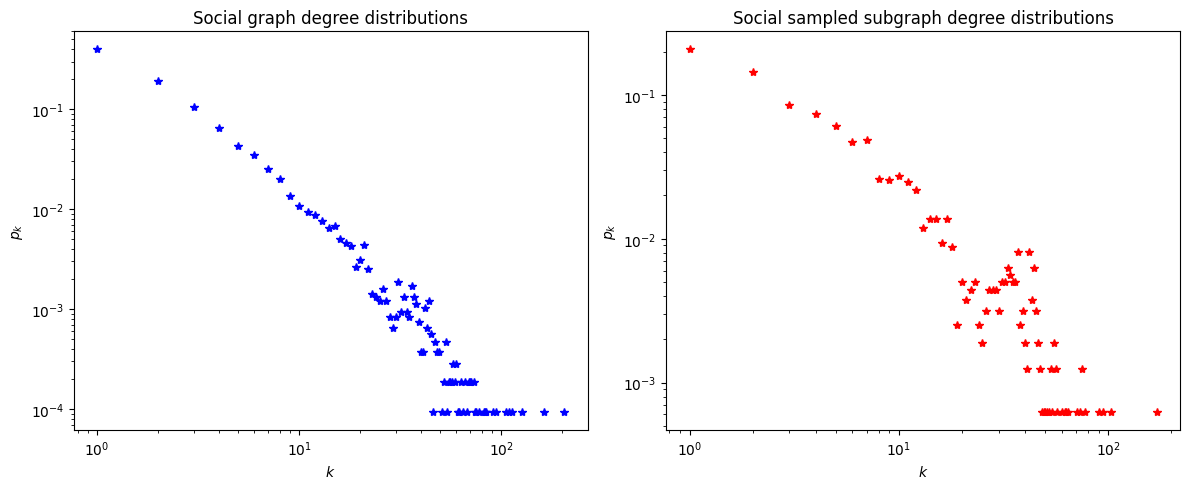

In [102]:
def plot(G, ax, c, type=0):
    nk = {}

    for _, k in G.degree():
        if k not in nk:
            nk[k] = 0
        nk[k] += 1
    ks = sorted(nk.keys())

    ax.loglog(ks, [nk[k] / len(G) for k in ks], '*', color=c)
    ax.set_xlabel('$k$')

fig, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True)
fig.set_figheight(5)
fig.set_figwidth(12)
plot(G, ax1, 'b', 0)
ax1.set_title("Social graph degree distributions")
ax1.set_ylabel('$p_k$')

plot(sub_G, ax2, 'r', 0)
ax2.set_title("Social sampled subgraph degree distributions")
ax2.set_ylabel('$p_k$')

plt.show()

## 3 Ring graph modularity

In [295]:
9*(3/36-(8/(2*36))**2)

def calc1(n, nc):
    mc = nc - 1
    c = n/nc
    kc = nc*2
    #print(c, mc, n, kc)
    return c*(mc/n - (kc/(2*n))**2)

def calc2(n, nc): # simplified calc1
    return 1 - 1/nc - nc/n

def calc3(n):
    return np.sqrt(n)

calc1(36, 4), calc2(36, 4), calc3(99)

(0.6388888888888888, 0.6388888888888888, 9.9498743710662)

Text(0.5, 1.0, '$n_c$ for $n=53$')

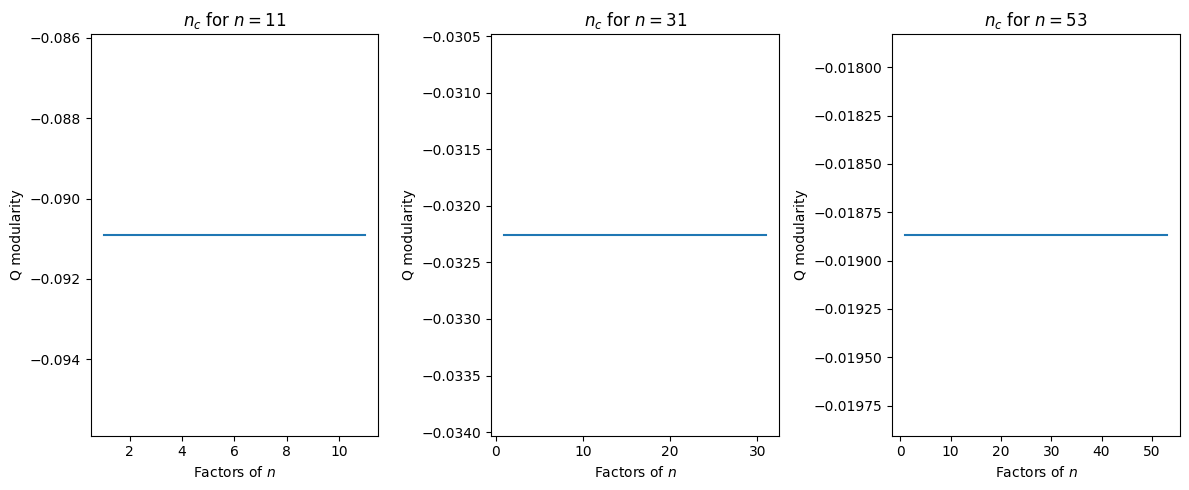

In [314]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, tight_layout=True)
fig.set_figheight(5)
fig.set_figwidth(12)
n = 11
cs = [i for i in range(1, n+1) if n%i==0]
res = []
for c in cs:
    nc = n/c
    res.append(calc1(n, nc))
ax1.plot(list(reversed(cs)), res)
ax1.set_ylabel("Q modularity")
ax1.set_xlabel("Factors of $n$")
ax1.set_title(f"$n_c$ for $n={n}$")

n = 31
cs = [i for i in range(1, n+1) if n%i==0]
res = []
for c in cs:
    nc = n/c
    res.append(calc1(n, nc))
ax2.plot(list(reversed(cs)), res)
ax2.set_ylabel("Q modularity")
ax2.set_xlabel("Factors of $n$")
ax2.set_title(f"$n_c$ for $n={n}$")

n = 53
cs = [i for i in range(1, n+1) if n%i==0]
res = []
for c in cs:
    nc = n/c
    res.append(calc1(n, nc))
ax3.plot(list(reversed(cs)), res)
ax3.set_ylabel("Q modularity")
ax3.set_xlabel("Factors of $n$")
ax3.set_title(f"$n_c$ for $n={n}$")

## 4 Who's the winner?
(i) Implement a variant of Girvan-Newman benchmark graphs with planted partition. Graphs should consist of 3 groups of 24 nodes each and expected degree of each node should be 20. Group structure is controlled by mixing parameter $\mu$. For $\mu=0$ all links are placed within the groups, while for $\mu=1$ all links are placed between the groups.

In [117]:
def girvan_newman(n=24, c=3, mu=0.2):
    G = nx.MultiGraph(name="Gir-New")
    for i in range(n*c):
        G.add_node(i, cluster=i//n+1) # add 3 groups/clusters of 24 nodes

    for i in range(len(G)):
        for j in range(i+1, len(G)):
            if G.nodes[i]['cluster'] == G.nodes[j]['cluster']:
                if random.random() < 20*(1-mu)/23: #expected degree*mu/nodes inside-1
                    G.add_edge(i, j)
            else:
                if random.random() < 20*mu/48: # expected degree*mu/nodes outside
                    G.add_edge(i, j)
    #utils.info(G)
    return G


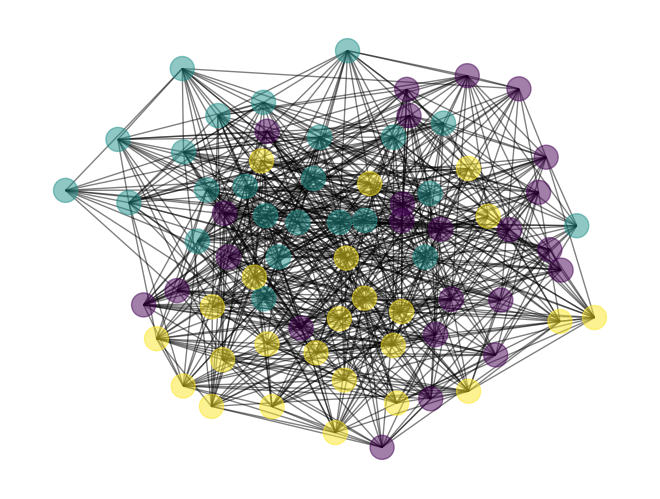

In [125]:
G = girvan_newman(n=24, c=3, mu=0.5)
nx.draw(G, with_labels=False, node_color=[G.nodes[n]['cluster'] for n in G.nodes], alpha=0.5)

testing FLPA: 100%|██████████| 25/25 [00:01<00:00, 13.60it/s]


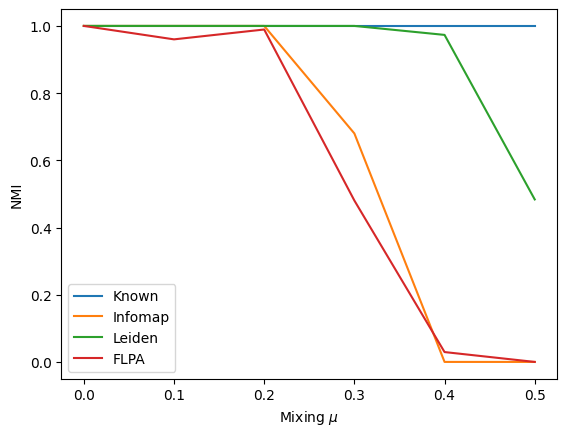

In [4]:
importlib.reload(u)
algs = {"Known": lambda G: u.known_clustering(G, cluster_attr="cluster"),
        "Infomap": algorithms.infomap, "Leiden": algorithms.leiden, "FLPA": u.fast_label_propagation}
#"Louvain": algorithms.louvain, "LPA": algorithms.label_propagation,
runs = 25
mus = np.arange(0, 0.6, 0.1)

# NOTE: this wasn't properly tested, as cdlib is a nightmare to install.

plt.figure()
for alg in algs:
    NMI = [0 for _ in range(len(mus))]

    for _ in tqdm(range(runs), desc=f"testing {alg}"):
        for i, mu in enumerate(mus):
            G = girvan_newman(n=24, c=3, mu=mu)

            K = u.known_clustering(G, cluster_attr="cluster")
            C = algs[alg](G)

            NMI[i] += K.normalized_mutual_information(C).score / runs

    plt.plot(mus, NMI, label=alg)

plt.xlabel("Mixing $\mu$")
plt.ylabel("NMI")
plt.legend()

plt.savefig("girvan_newman.pdf", bbox_inches='tight')

(ii) Consider more realistic Lancichinetti benchmark graphs with planted partition.
The graphs consist of 2 500 nodes, while the group structure is again controlled
by a mixing parameter $\mu$.

In [127]:
importlib.reload(u)
path = r"LFR\\LFR\\"
Gs = {}
mus2 = [0, 2, 4, 6, 8]
for mu in mus2:
    tmp = []
    for i in range(25):
        G = u.read_pajek(path+'LFR_0'+str(mu)+'_'+str(i)+'.net')
        tmp.append(G)
    Gs[mu/10] = tmp

testing Known:   0%|          | 0/25 [00:00<?, ?it/s]

testing FLPA: 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]


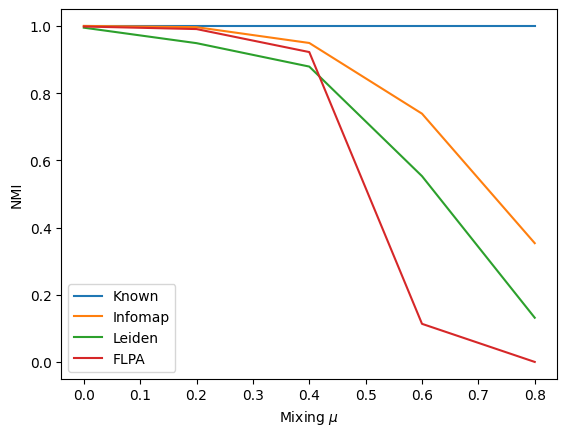

In [24]:
algs = {"Known": lambda G: u.known_clustering(G, cluster_attr="value"), "Infomap": algorithms.infomap, "Leiden": algorithms.leiden, "FLPA": u.fast_label_propagation}
#
runs = 25

plt.figure()
for alg in algs:
    NMI = [0 for _ in range(len(mus2))]

    for _ in tqdm(range(runs), desc=f"testing {alg}"):
        for i, mu in enumerate(Gs.keys()):
            #G = girvan_newman(n=24, c=3, mu=mu)
            G = Gs[mu][i]
            K = u.known_clustering(G, cluster_attr="value")
            C = algs[alg](G)

            NMI[i] += K.normalized_mutual_information(C).score / runs

    plt.plot(Gs.keys(), NMI, label=alg)

plt.xlabel("Mixing $\mu$")
plt.ylabel("NMI")
plt.legend()

plt.savefig("lancichinetti.pdf", bbox_inches='tight')

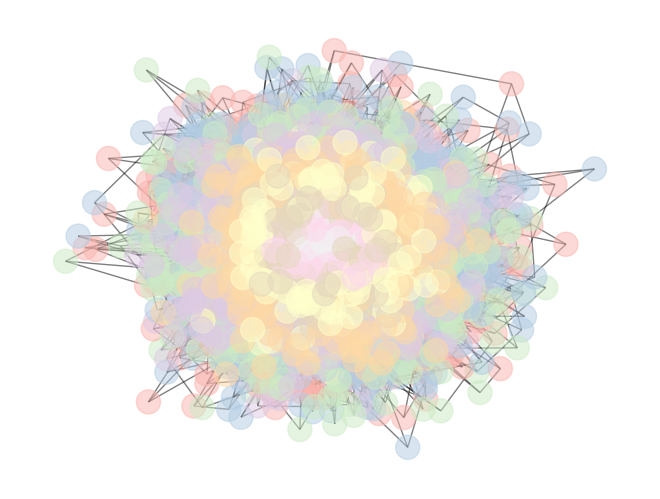

In [130]:
nx.draw(Gs[0.8][2], with_labels=False, node_color=[int(G.nodes[n]['label']) for n in G.nodes], alpha=0.5, cmap='Pastel1')

(iii) Apply the community detection algorithms to 25 random graph realizations (ER) with 1 000
nodes and the average node degree equal to 8, 16, 24, 32 and 40.

In [15]:
n = 1000
k = 8 # 16, 24, 32, 40
p = k / (n - 1)
G = nx.erdos_renyi_graph(n, p)
u.info(G) 

       Graph | ''
       Nodes | 1,000 (iso=0)
       Edges | 4,032 (loop=0)
      Degree | 8.06 (max=20)
         LCC | 100.0% (n=1)
  Clustering | 0.0082



testing Known:   0%|          | 0/25 [00:00<?, ?it/s]

testing FLPA: 100%|██████████| 25/25 [00:40<00:00,  1.64s/it]


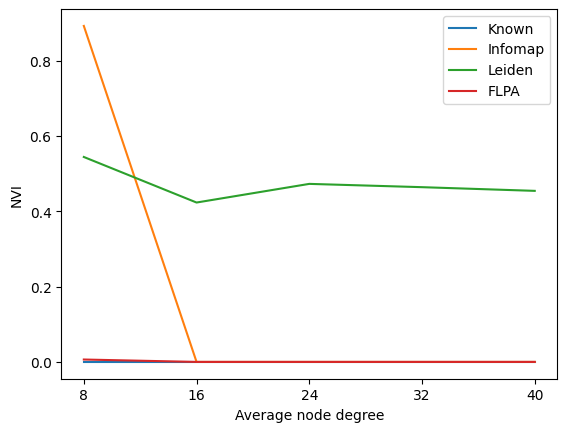

In [32]:
algs = {"Known": lambda G: u.known_clustering(G, cluster_attr="cluster"), "Infomap": algorithms.infomap, "Leiden": algorithms.leiden, "FLPA": u.fast_label_propagation}
# 
runs = 25
n = 1000
ks = [8, 16, 24, 32, 40]
plt.figure()
for alg in algs:
    NVI = [0 for _ in range(len(ks))]

    for _ in tqdm(range(runs), desc=f"testing {alg}"):
        for i, k in enumerate(ks):
            #G = girvan_newman(n=24, c=3, mu=mu)
            #G = Gs[mu][i]
            p = k/(n-1)
            G = nx.MultiGraph(nx.erdos_renyi_graph(n, p))
            for node in G.nodes:
                G.nodes[node]['cluster'] = 0
            K = u.known_clustering(G, cluster_attr="cluster")
            C = algs[alg](G)

            NVI[i] += (K.variation_of_information(C).score / np.log(len(G.nodes))) / runs

    plt.plot(ks, NVI, label=alg)

plt.xlabel("Average node degree")
plt.ylabel("NVI")
plt.xticks(ks)
plt.legend()

plt.savefig("erdos_renyi.pdf", bbox_inches='tight')

## 5 Get at least 70% right!

You are given a citation network between scientific papers published by the American Physical
Society between the years 2008 and 2013. The papers were published in 10 different journals
(e.g., Physical Review E) which represent the information you would like to infer from the
structure of the citation network.

Your task is to predict the correct journal of all papers published in the year 2013 based
on their citations and the journal information of papers published between the years 2008 and
2012. Predicting the paper’s journal to be the most frequent journal in the neighborhood of
the corresponding node gives ≈ 67% classification accuracy, whereas your task is to propose a
strategy that gives ≥ 70% classification accuracy.

In [291]:
G = u.read_pajek("aps_2008_2013.net")
u.info(G)

MultiDiGraph | 'aps_2008_2013'
       Nodes | 90,162 (iso=0)
       Edges | 429,650 (loop=22)
      Degree | 4.77 max(in=1341, out=228)
         LCC | 100.0% (n=1)
  Clustering | 0.2521



In [294]:
acc_sum = 0
for i in range(1):
    C = u.fast_label_propagation(nx.MultiGraph(G))
    #C = algorithms.leiden(G)
    #C = algorithms.infomap(G)

    data = pd.DataFrame()
    data['Nodes'] = list(G.nodes)
    data['GT'] = [int(G.nodes[node]['value']) for node in G.nodes]
    data['Predicted'] = 0

    for com in C.communities:
        count = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0,
                6: 0, 7: 0, 8: 0, 9: 0, 10: 0}
        for node in com:
            journal = G.nodes[node]['value']
            #print(int(journal))
            count[int(journal)] += 1
        max_key = max(count, key=count.get)
        data["Predicted"][com] = max_key

    acc = sum(data["GT"] == data["Predicted"])/len(data)
    acc_sum += acc
    print(f"Run {i} accuracy = {acc}")  

print(f"Average classification accuracy over 10 runs: {acc_sum/10}")    

Run 0 accuracy = 0.7349992236197067
Average classification accuracy over 10 runs: 0.07349992236197067


## 6 Peers, ties and the Internet

In [138]:
class GraphLinkPredictionMethods:
    def __init__(self, G, clusters=False) -> None:
        self.G = G
        if clusters:
            self.C = algorithms.leiden(G) # precompute clusters for the community index
            self.cluster_data, self.node_data = self.setup()

    def setup(self):

        cluster_data = {}
        node_data = {}

        for i, com in enumerate(self.C.communities):
            tmp_subgraph = self.G.subgraph(com)
            mc = tmp_subgraph.number_of_edges()
            nc = tmp_subgraph.number_of_nodes()
            s_ij = mc/math.comb(nc, 2) if nc >= 2 else 0

            cluster_data[i] = (mc, nc, s_ij)

            for node in com:
                node_data[node] = i

        return cluster_data, node_data

    def preferential_attachement_index(self, node1, node2): # preferential attachement index
        s_ij = self.G.degree(node1) * self.G.degree(node2)
        return s_ij

    def adamic_adar_index(self, node1, node2): # Adamic-Adar index
        neigh1 = set(self.G.neighbors(node1))
        neigh2 = set(self.G.neighbors(node2))
        common_neigh = neigh1.intersection(neigh2) # get common neighbors of node1 and node2
        s_ij = sum([1/np.log(self.G.degree(node)) for node in common_neigh])
        return s_ij

    def community_index(self, node1, node2):
        cluster_idx1 = self.node_data.get(node1)
        cluster_idx2 = self.node_data.get(node2)

        if cluster_idx1 is not None and cluster_idx1 == cluster_idx2:
            mc, nc, s_ij = self.cluster_data[cluster_idx1]
            return s_ij

        return 0

def get_negative_examples(G, examples):
    LN = set()
    nodes = list(G.nodes)
    while len(LN) < examples:
        # randomly sample the node pairs
        node1 = random.choice(nodes)
        node2 = random.choice(nodes)

        # check if they are neighbours
        if not G.has_edge(node1, node2):
            LN.add((node1, node2))
    
    return LN

def get_positive_examples(G, examples):
    G_changed = G.copy()
    LP = set()
    edges = list(G.edges)
    m = len(edges)

    while len(LP) < examples:
        idx = random.randint(0, m-1)
        edge = edges[idx]
        #edge = random.choice(edges)
        node1, node2 = edge
        LP.add(edge)
        G_changed.remove_edge(node1, node2)
        del edges[idx]
        m -= 1

    return LP, G_changed

def framework(G:nx.Graph, choosen_index:str):
    num_examples = G.number_of_edges() / 10

    #print("getting pos and neg node pairs...")
    LN = get_negative_examples(G, int(num_examples))
    LP, G_changed = get_positive_examples(G, int(num_examples))
    
    method_setup = GraphLinkPredictionMethods(G_changed, (choosen_index=="community_index"))
    index_method = getattr(method_setup, choosen_index)

    #print("calculating index for each pair...")
    # precompute the indexes for ALL the randomly selected pairs
    neg_indexes = [index_method(node1, node2) for node1, node2 in LN]
    pos_indexes = [index_method(node1, node2) for node1, node2 in LP]

    #print("sampling from calculated indexes...")
    # sample the indexes - m/10 times with repetitions
    neg_samples = [random.choice(neg_indexes) for _ in range(int(num_examples))]
    pos_samples = [random.choice(pos_indexes) for _ in range(int(num_examples))]

    m_prime = 0
    m_prime_prime = 0

    #print("calculating AUC...")
    for neg, pos in zip(neg_samples, pos_samples):
        if pos > neg:
            m_prime += 1
        elif pos == neg:
            m_prime_prime += 1
    
    auc = (m_prime + m_prime_prime/2) / num_examples
    return auc

def run_methods(G, n=10):
    print(f"Graph: {G.name}")
    for index_m in ["preferential_attachement_index", "adamic_adar_index", "community_index"]:
        aucs = []
        for _ in range(n):
            auc = framework(G, index_m)
            #print(auc)
            aucs.append(auc)
        print(f"Method {index_m} average (n=10) AUC: {round(sum(aucs)/n, 3)}")

In [86]:
n = 25000
k = 10
p = k/(n-1)
G_ER = nx.erdos_renyi_graph(n, p)
G_ER.name = "Erdos_Renyi"
u.info(G_ER)

       Graph | 'Erdos_Renyi'
       Nodes | 25,000 (iso=1)
       Edges | 124,925 (loop=0)
      Degree | 9.99 (max=25)
         LCC | 100.0% (n=2)
  Clustering | 0.0004



In [142]:
run_methods(G_ER)

Graph: Erdos_Renyi
Method preferential_attachement_index average (n=10) AUC: 0.5
Method adamic_adar_index average (n=10) AUC: 0.5
Method community_index average (n=10) AUC: 0.501


In [144]:
G_gnu = nx.Graph(u.read_pajek("gnutella.net"))
u.info(G_gnu)

       Graph | 'gnutella'
       Nodes | 62,586 (iso=0)
       Edges | 147,892 (loop=0)
      Degree | 4.73 (max=95)
         LCC | 100.0% (n=12)
  Clustering | 0.0049



In [143]:
run_methods(G_gnu)

Graph: gnutella
Method preferential_attachement_index average (n=10) AUC: 0.719
Method adamic_adar_index average (n=10) AUC: 0.514
Method community_index average (n=10) AUC: 0.532


In [145]:
G_circ = nx.Graph(u.read_pajek("circles.net"))
u.info(G_circ)

       Graph | 'circles'
       Nodes | 4,039 (iso=0)
       Edges | 88,234 (loop=0)
      Degree | 43.69 (max=1,045)


         LCC | 100.0% (n=1)
  Clustering | 0.6055



In [146]:
run_methods(G_circ)

Graph: circles
Method preferential_attachement_index average (n=10) AUC: 0.832
Method adamic_adar_index average (n=10) AUC: 0.994
Method community_index average (n=10) AUC: 0.955


In [147]:
G_nec = nx.Graph(u.read_pajek("nec.net"))
u.info(G_nec)

       Graph | 'nec'
       Nodes | 75,885 (iso=0)
       Edges | 357,317 (loop=0)
      Degree | 9.42 (max=13,346)
         LCC | 100.0% (n=1)
  Clustering | 0.1614



In [148]:
run_methods(G_nec)

Graph: nec
Method preferential_attachement_index average (n=10) AUC: 0.823
Method adamic_adar_index average (n=10) AUC: 0.696
Method community_index average (n=10) AUC: 0.898


In [ ]:
"""
ALL RESULTS

Graph: Erdos_Renyi
Method preferential_attachement_index average (n=10) AUC: 0.5
Method adamic_adar_index average (n=10) AUC: 0.5
Method community_index average (n=10) AUC: 0.501

Graph: gnutella
Method preferential_attachement_index average (n=10) AUC: 0.719
Method adamic_adar_index average (n=10) AUC: 0.514
Method community_index average (n=10) AUC: 0.532

Graph: circles
Method preferential_attachement_index average (n=10) AUC: 0.832
Method adamic_adar_index average (n=10) AUC: 0.994
Method community_index average (n=10) AUC: 0.955

Graph: nec
Method preferential_attachement_index average (n=10) AUC: 0.823
Method adamic_adar_index average (n=10) AUC: 0.696
Method community_index average (n=10) AUC: 0.898
"""